<a href="https://colab.research.google.com/github/Adiyasa26/Python_/blob/main/Perancangan_Fiber_To_The_Building_beserta_Analisisnya_TUBES_SKO_Ilyas_Adiyasa_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA**  : ILYAS ADIYASA

**NIM**   : 1101184270

**KELAS** : TT - 42 - 07


**Skenario Perancangan FTTB**:

Dari **sentral** menuju **ODC** kemudian ke **ONU** kemudian ke **ODP** kemudian ke **Roset**. Satu gedung berisikan 40 lantai, tiap lantai terdapat 20 kamar. Dengan rencana tersebut kami akan menggunakan **6 konektor** dan **2 spliter**, dengan **spliter 1:64** dengan redaman **19.5 dB** untuk **ONU ke ODP** dan spliter **1:32** dengan redaman **16 dB** untuk **ODP ke Roset**. Kami menggunakan **fiber jenis G652D** dengan panjang gelombang **1490 nm** dengan redaman **0.28 dB/Km**. Selain itu, dengan jumlah konektor terdapat 6 dan splitter 2, maka **splicer ada 8** buah yang memiliki redaman **0.1 db**.


**Diketahui** : 


1.   Jenis Fiber = G652D (1490 nm)
2.   Hambatan Fiber = 0.28  dB/Km 
3.   Jumlah Konektor = 6 buah
4.   Hambatan Konekor = 0.3 dB
5.   Jumlah Splitter = 2 (1:64 dan 1:32)
6.   Hambatan Splitter = 19.5 dB dan 16 dB
7.   Jumlah Splicer = 8 buah
8.   Hambatan Splicer = 0.1 dB
9.   Safety Margin = 6 dB
10.  Margin = -0.23
11.  Faktor Gain = 0<F(M)<1 ambil 1
12.  Suhu Perangkat = 290 K
13.  Arus Gelap = 200 nA
14.  Hambatan Ekuivalensi = 50 Ohm
15.  Responsivitas = 0.85 A/W





In [8]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

In [91]:
#Converter
NtL = lambda x : 10 * np.log10(x)
LtN = lambda x : 10**(x/10)

#Parameter SNR
R = 0.85 #Responsivitas (A/W)
SM = 3 #Safety Margin (dB)
M = -0.23 #Tambahan daya sinyal APD (dB)
q = 1.6*10**-19
id = 200*10**-9 #arus gelap (A)
B = 8*10**9 #Bandwith (Hz)
F = 1 #F(M), Faktor Gain
K = 1.38*10**-23
Teff = 290 #Kelvin
RL = 50 #Ekuivalen Resistansi (Ohm)

#Parameter Pr
#jarak dari sentral ke ONU = 20 km
#jarak dari ONU ke Roset = <500 m --> Jarak ONU ke ODP = 4*29 = 116 m, Jarak ODP ke Roset terjauh = 4*20 = 80, Jarak ONU ke roset = 116 + 80 = 196 
#jarak total = 20000 + 116 = 20116 m

d = np.arange(0.197,20.197,0.5) #Jarak (km)
L_fiber = 0.28 #0.28 #Loss dari fiber berdasarkan jenis G625D (dB)  
N_splicer = 8 #Jumlah Splicer
L_splicer = 0.1 #Loss dari splicer (db)
N_connector = 6 #Jumlah Konektor
L_connector = 0.3 #Loss dari konektor (dB)
L_splitter = 16 + 19.5 #loss dari splitter (dB) diambil redaman yang paling kecil, milik 1:32
Pt = 3 #Daya tx (dBm)

In [92]:
#RUMUS PR
def P_receive():
  #Pr,Pt (dBm)
  #L_fiber,N_splitter,L_splicer,N_connector,L_connector,L_splitter (dB)

  hambatan_fiber = d * L_fiber
  hambatan_splicer = N_splicer * L_splicer
  hambatan_connector = N_connector * L_connector

  alfa_total = hambatan_fiber + hambatan_splicer + hambatan_connector + L_splitter + SM
  Pr = Pt - alfa_total
  return Pr,alfa_total
Pr,alfa_total = P_receive()
print('Hambatan Total = ', alfa_total)
print('\nDaya Terima = ', Pr)

Hambatan Total =  [41.15516 41.29516 41.43516 41.57516 41.71516 41.85516 41.99516 42.13516
 42.27516 42.41516 42.55516 42.69516 42.83516 42.97516 43.11516 43.25516
 43.39516 43.53516 43.67516 43.81516 43.95516 44.09516 44.23516 44.37516
 44.51516 44.65516 44.79516 44.93516 45.07516 45.21516 45.35516 45.49516
 45.63516 45.77516 45.91516 46.05516 46.19516 46.33516 46.47516 46.61516]

Daya Terima =  [-38.15516 -38.29516 -38.43516 -38.57516 -38.71516 -38.85516 -38.99516
 -39.13516 -39.27516 -39.41516 -39.55516 -39.69516 -39.83516 -39.97516
 -40.11516 -40.25516 -40.39516 -40.53516 -40.67516 -40.81516 -40.95516
 -41.09516 -41.23516 -41.37516 -41.51516 -41.65516 -41.79516 -41.93516
 -42.07516 -42.21516 -42.35516 -42.49516 -42.63516 -42.77516 -42.91516
 -43.05516 -43.19516 -43.33516 -43.47516 -43.61516]


In [95]:
#Signal Power
def signal_power():
  Pr_num = LtN(Pr)
  ip = Pr_num * R
  Is_kuadrat = (ip*M)**2
  return ip,Is_kuadrat
ip,Is_kuadrat = signal_power()
print('Arus Primer = ', ip)
print('\nIs^2 = ', Is_kuadrat)

Arus Primer =  [1.29987899e-04 1.25864405e-04 1.21871716e-04 1.18005684e-04
 1.14262291e-04 1.10637646e-04 1.07127982e-04 1.03729653e-04
 1.00439126e-04 9.72529818e-05 9.41679087e-05 9.11807008e-05
 8.82882535e-05 8.54875608e-05 8.27757121e-05 8.01498891e-05
 7.76073628e-05 7.51454909e-05 7.27617148e-05 7.04535572e-05
 6.82186194e-05 6.60545785e-05 6.39591857e-05 6.19302632e-05
 5.99657025e-05 5.80634619e-05 5.62215644e-05 5.44380958e-05
 5.27112027e-05 5.10390904e-05 4.94200210e-05 4.78523120e-05
 4.63343341e-05 4.48645097e-05 4.34413113e-05 4.20632597e-05
 4.07289230e-05 3.94369142e-05 3.81858908e-05 3.69745524e-05]

Is^2 =  [8.93843576e-10 8.38033777e-10 7.85708630e-10 7.36650560e-10
 6.90655578e-10 6.47532429e-10 6.07101804e-10 5.69195586e-10
 5.33656156e-10 5.00335736e-10 4.69095777e-10 4.39806378e-10
 4.12345751e-10 3.86599710e-10 3.62461200e-10 3.39829850e-10
 3.18611556e-10 2.98718090e-10 2.80066732e-10 2.62579927e-10
 2.46184963e-10 2.30813668e-10 2.16402126e-10 2.02890412e-10

In [97]:
#RUMUS SNR
def SNR():
  #PARAMETER PELENGKAP RUMUS NOISE
  BDC = 2*q*id*B*(M**2)*F #Dark Current (Numerik)
  SN = 2*q*ip*B*(M**2)*F #Shot Noise (Numerik)
  NT = (4*K*Teff*B)/RL #Noise Thermal (Numerik)

  #PARAMETER RUMUS
  Signal = Is_kuadrat # (Numerik)
  Noise = BDC + SN + NT # (Numerik)

  #RUMUS SNR
  SNR = Signal / Noise
  SNR_dBm = NtL(SNR)
  
  return SNR_dBm

SNR = SNR()
print('SNR dalam dBm = ', SNR)

SNR dalam dBm =  [25.39825242 25.11919291 24.84010377 24.56098591 24.28184024 24.00266763
 23.72346892 23.44424493 23.16499646 22.88572427 22.60642912 22.32711171
 22.04777275 21.76841292 21.48903286 21.20963323 20.93021463 20.65077767
 20.37132291 20.09185092 19.81236224 19.5328574  19.25333691 18.97380125
 18.69425091 18.41468635 18.13510803 17.85551636 17.57591178 17.29629468
 17.01666548 16.73702454 16.45737224 16.17770893 15.89803497 15.61835069
 15.33865642 15.05895247 14.77923915 14.49951675]


In [88]:
#RUMUS Q
def Q_rumus():
  Q_rumus = 0.5*(10**(SNR/20)) #penurunan rumus SNR
  return Q_rumus
Q = Q_rumus()
print('Q = ', Q)

Q =  [9.30856263 9.01425107 8.72921505 8.4531641  8.18581671 7.92690011
 7.67614996 7.4333101  7.19813235 6.9703762  6.74980863 6.53620387
 6.32934315 6.12901452 5.93501263 5.74713854 5.56519948 5.38900874
 5.21838539 5.05315419 4.89314535 4.73819439 4.58814199 4.4428338
 4.3021203  4.16585666 4.03390258 3.90612217 3.78238379 3.66255992
 3.54652706 3.43416558 3.3253596  3.21999688 3.11796871 3.0191698
 2.92349816 2.83085502 2.7411447  2.65427454]


In [98]:
#RUMUS BER
pengkali_list = []
def BER_rumus():
  #PARAMETER PELENGKAP RUMUS BER
  akar = 1/(Q * m.sqrt(2 * m.pi))

  #PERULANGAN YANG DIGUNAKAN UNTUK KALKULASI Q PASA LIBRARY MATH
  for i in range(len(Q)):
    pengkali = m.exp(-(Q[i]**2)/2)
    pengkali_list.append(pengkali)
  #RUMUS BER
  BER = (1/akar)*(pengkali_list)

  return BER
  
BER = BER_rumus()
print('BER = ', BER)

BER =  [3.56703865e-18 5.12090271e-17 6.21756149e-16 6.45118686e-15
 5.77613739e-14 4.50385680e-13 3.08465150e-12 1.87066932e-11
 1.01212939e-10 4.92038355e-10 2.16357128e-09 8.65883690e-09
 3.17251103e-08 1.07000003e-07 3.33914864e-07 9.68846109e-07
 2.62546831e-06 6.67322313e-06 1.59724296e-05 3.61355846e-05
 7.75442478e-05 1.58358615e-04 3.08709523e-04 5.76142736e-04
 1.03218951e-03 1.77968238e-03 2.96015932e-03 4.76045723e-03
 7.41744533e-03 1.12198391e-02 1.65061913e-02 2.36584695e-02
 3.30910680e-02 4.52355936e-02 6.05222520e-02 7.93590552e-02
 1.02110336e-01 1.29076149e-01 1.60474056e-01 1.96424574e-01]


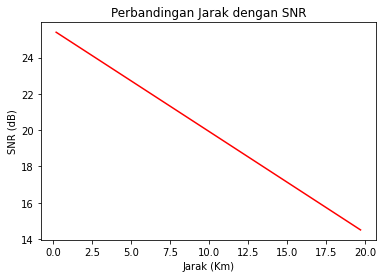

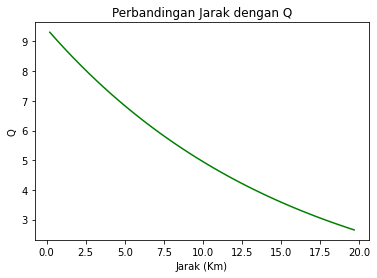

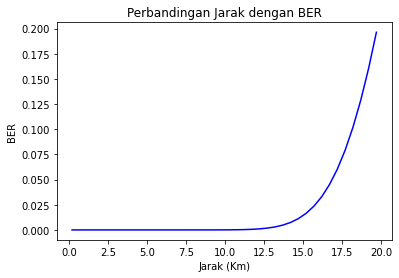

In [99]:
#GRAFIK

#GRAFIK PERBANDINGAN JARAK DENGAN SNR
def grafik_1():
  plt.figure()
  plt.plot(d,SNR,'r')
  plt.title('Perbandingan Jarak dengan SNR')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('SNR (dB)')
  plt.show()

#GRAFIK PERBANDINGAN JARAK DENGAN Q-FACTOR
def grafik_2():
  plt.figure()
  plt.plot(d,Q,'g')
  plt.title('Perbandingan Jarak dengan Q')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('Q')
  plt.show()

#GRAFIK PERBANDINGAN ANTARA JARAK DENGAN BER
def grafik_3():
  plt.figure()
  plt.plot(d,BER,'b')
  plt.title('Perbandingan Jarak dengan BER')
  plt.xlabel('Jarak (Km)')
  plt.ylabel('BER')
  plt.show()

grafik_1()
grafik_2()
grafik_3()